In [1]:
import requests, json
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
url = 'https://nfdirepo.fokus.fraunhofer.de'
ID = 'doi:10.82207/FK2/152X6I/OVLZEE'

In [4]:
root_ID = 'root'
dataset_ID = '46'
version = '2.0'

In [5]:
#answer = requests.get(url+'/api/dataverses/'+root_ID+'/contents')
#answer.json()

In [6]:
#answer = requests.get(url+'/api/datasets/'+dataset_ID+'/versions')
#answer.json()

In [7]:
#answer = requests.get(url+'/api/datasets/'+dataset_ID+'/versions/'+version+'/files')
#answer.json()

In [8]:
get_original = requests.get(url+'/api/access/datafile/:persistentId/?persistentId='+ID, params='format=original')

In [9]:
xlsx = pd.ExcelFile(get_original.content)
xlsx.sheet_names

['rawdata',
 'c_overview',
 'c_vsTOS',
 'c_mean',
 'xs_vsTOS',
 'xs_d_vsTOS',
 'xs_mean',
 'xs_d_mean',
 'Y_vsTOS',
 'Y_mean',
 'R_vsTOS',
 'r(Cat)_vsTOS',
 'r(Rh)_vsTOS',
 'r_mean']

In [10]:
data = pd.read_excel(get_original.content, sheet_name=0)
data.head()

,Clock,X00MPV800.PV,X10TIC500.TargetSP,X10TI_501B.PV,X20TI_501B.PV,X30TI_501B.PV,X40TI_501B.PV,X10FIC112.PV,X10FIC122.PV,X10FIC132.PV,X10FIC142.PV,X10FIC152.PV,X10PIC508.PV,Injection.Date,CO_FID1A..Amount.,CO_TCD3C..Amount.,H2_TCD3C..Amount.,N2_TCD3C..Amount.,Argon_TCD3C..Amount.,Methane_TCD3C..Amount.,Methane_FID1A..Amount.,Ethane_FID1A..Amount.,Propane_FID1A..Amount.,n.Butane_FID1A..Amount.,nC5_FID1A..Amount.,nC6_FID1A..Amount.,Ethylene_FID1A..Amount.,Propylene_FID1A..Amount.,n.Butene_FID1A..Amount.,C5..1_FID1A..Amount.,C6..1_FID1A..Amount.,Methanol_FID1A..Amount.,Ethanol_FID1A..Amount.,n.Propanol_FID1A..Amount.,n.Butanol_FID1A..Amount.,Acetaldehyde_FID1A..Amount.,Propanal_FID1A..Amount.,Butanal_FID1A..Amount.,AcOH_FID1A..Amount.,Methylacetate_FID1A..Amount.,Ethylacetate_FID1A..Amount.,Unknown_FID1A..Amount.,CO2_FID1A..Amount.
0,"01-07-2020 15:48:37,85",5,260,57.60088,57.93729,57.89368,57.72243,20.700074,41.411194,125.570189,20.768454,0,54.65061,"01-07-2020 15:48:37,00",18.15814,18.23968,54.95448,12.35992,12.23979,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00381
1,"01-07-2020 17:24:24,85",2,260,259.36343,259.46243,259.55496,259.30121,20.766821,41.436230,125.081900,20.761825,0,54.74126,"01-07-2020 17:24:24,00",5.43916,5.59723,14.38053,67.38940,4.44028,0.29522,0.28236,0.01739,0.00757,0.00245,0.00131,0.00049,0.00044,0.00333,0.00043,0,0,0.00076,0.06880,0.00326,0.00068,0.02584,0.00105,0.00042,0.06915,0.00461,0.00922,0,0.01477
2,"01-07-2020 18:06:16,86",3,260,259.80377,260.13226,260.07336,259.90491,20.748758,41.477016,125.429444,20.758588,0,54.73558,"01-07-2020 18:06:16,00",5.15823,5.31591,14.16739,68.17913,4.18334,0.37943,0.37130,0.00540,0.00122,0.00023,0.00000,0.00000,0.00000,0.00040,0.00000,0,0,0.13052,0.10526,0.00216,0.00021,0.00041,0.00000,0.00000,0.01015,0.00334,0.00195,0,0.03503
3,"01-07-2020 18:48:07,85",4,260,259.78979,260.13382,260.07733,259.97348,20.745737,41.599277,125.610067,20.763423,0,54.75257,"01-07-2020 18:48:07,00",5.30167,5.46491,14.35137,67.71499,4.20771,0.28662,0.27535,0.00501,0.00129,0.00026,0.00000,0.00000,0.00000,0.00061,0.00000,0,0,0.10274,0.11822,0.00213,0.00021,0.00081,0.00000,0.00000,0.01708,0.00624,0.00492,0,0.04898
4,"01-07-2020 19:29:56,85",5,260,259.79492,260.12787,260.06900,259.97501,20.758874,41.606597,125.694456,20.760639,0,54.76959,"01-07-2020 19:29:56,00",18.13574,18.42080,54.73019,12.03225,12.16769,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0.00000,0.00040,0.00000,0.00000,0.00000,0.00000,0.00000,0.00388,0.00000,0.00000,0,0.00785


In [11]:
#get_file = requests.get(url+'/api/access/datafile/:persistentId/?persistentId='+ID)
#data = pd.read_csv(StringIO(get_file.text), sep='\t', lineterminator='\n')
#data.head()

In [12]:
data['Clock'] = pd.to_datetime(data['Clock'], format='%d-%m-%Y %H:%M:%S,%f')
data['Injection.Date'] = pd.to_datetime(data['Injection.Date'], format='%d-%m-%Y %H:%M:%S,%f')

In [13]:
data.head()

,Clock,X00MPV800.PV,X10TIC500.TargetSP,X10TI_501B.PV,X20TI_501B.PV,X30TI_501B.PV,X40TI_501B.PV,X10FIC112.PV,X10FIC122.PV,X10FIC132.PV,X10FIC142.PV,X10FIC152.PV,X10PIC508.PV,Injection.Date,CO_FID1A..Amount.,CO_TCD3C..Amount.,H2_TCD3C..Amount.,N2_TCD3C..Amount.,Argon_TCD3C..Amount.,Methane_TCD3C..Amount.,Methane_FID1A..Amount.,Ethane_FID1A..Amount.,Propane_FID1A..Amount.,n.Butane_FID1A..Amount.,nC5_FID1A..Amount.,nC6_FID1A..Amount.,Ethylene_FID1A..Amount.,Propylene_FID1A..Amount.,n.Butene_FID1A..Amount.,C5..1_FID1A..Amount.,C6..1_FID1A..Amount.,Methanol_FID1A..Amount.,Ethanol_FID1A..Amount.,n.Propanol_FID1A..Amount.,n.Butanol_FID1A..Amount.,Acetaldehyde_FID1A..Amount.,Propanal_FID1A..Amount.,Butanal_FID1A..Amount.,AcOH_FID1A..Amount.,Methylacetate_FID1A..Amount.,Ethylacetate_FID1A..Amount.,Unknown_FID1A..Amount.,CO2_FID1A..Amount.
0,2020-07-01 15:48:37.850,5,260,57.60088,57.93729,57.89368,57.72243,20.700074,41.411194,125.570189,20.768454,0,54.65061,2020-07-01 15:48:37,18.15814,18.23968,54.95448,12.35992,12.23979,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00381
1,2020-07-01 17:24:24.850,2,260,259.36343,259.46243,259.55496,259.30121,20.766821,41.436230,125.081900,20.761825,0,54.74126,2020-07-01 17:24:24,5.43916,5.59723,14.38053,67.38940,4.44028,0.29522,0.28236,0.01739,0.00757,0.00245,0.00131,0.00049,0.00044,0.00333,0.00043,0,0,0.00076,0.06880,0.00326,0.00068,0.02584,0.00105,0.00042,0.06915,0.00461,0.00922,0,0.01477
2,2020-07-01 18:06:16.860,3,260,259.80377,260.13226,260.07336,259.90491,20.748758,41.477016,125.429444,20.758588,0,54.73558,2020-07-01 18:06:16,5.15823,5.31591,14.16739,68.17913,4.18334,0.37943,0.37130,0.00540,0.00122,0.00023,0.00000,0.00000,0.00000,0.00040,0.00000,0,0,0.13052,0.10526,0.00216,0.00021,0.00041,0.00000,0.00000,0.01015,0.00334,0.00195,0,0.03503
3,2020-07-01 18:48:07.850,4,260,259.78979,260.13382,260.07733,259.97348,20.745737,41.599277,125.610067,20.763423,0,54.75257,2020-07-01 18:48:07,5.30167,5.46491,14.35137,67.71499,4.20771,0.28662,0.27535,0.00501,0.00129,0.00026,0.00000,0.00000,0.00000,0.00061,0.00000,0,0,0.10274,0.11822,0.00213,0.00021,0.00081,0.00000,0.00000,0.01708,0.00624,0.00492,0,0.04898
4,2020-07-01 19:29:56.850,5,260,259.79492,260.12787,260.06900,259.97501,20.758874,41.606597,125.694456,20.760639,0,54.76959,2020-07-01 19:29:56,18.13574,18.42080,54.73019,12.03225,12.16769,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0.00000,0.00040,0.00000,0.00000,0.00000,0.00000,0.00000,0.00388,0.00000,0.00000,0,0.00785


In [14]:
reactor_1 = data[data['X00MPV800.PV']==1.0]
reactor_1.columns

Index(['Clock', 'X00MPV800.PV', 'X10TIC500.TargetSP', 'X10TI_501B.PV',
       'X20TI_501B.PV', 'X30TI_501B.PV', 'X40TI_501B.PV', 'X10FIC112.PV',
       'X10FIC122.PV', 'X10FIC132.PV', 'X10FIC142.PV', 'X10FIC152.PV',
       'X10PIC508.PV', 'Injection.Date', 'CO_FID1A..Amount.',
       'CO_TCD3C..Amount.', 'H2_TCD3C..Amount.', 'N2_TCD3C..Amount.',
       'Argon_TCD3C..Amount.', 'Methane_TCD3C..Amount.',
       'Methane_FID1A..Amount.', 'Ethane_FID1A..Amount.',
       'Propane_FID1A..Amount.', 'n.Butane_FID1A..Amount.',
       'nC5_FID1A..Amount.', 'nC6_FID1A..Amount.', 'Ethylene_FID1A..Amount.',
       'Propylene_FID1A..Amount.', 'n.Butene_FID1A..Amount.',
       'C5..1_FID1A..Amount.', 'C6..1_FID1A..Amount.',
       'Methanol_FID1A..Amount.', 'Ethanol_FID1A..Amount.',
       'n.Propanol_FID1A..Amount.', 'n.Butanol_FID1A..Amount.',
       'Acetaldehyde_FID1A..Amount.', 'Propanal_FID1A..Amount.',
       'Butanal_FID1A..Amount.', 'AcOH_FID1A..Amount.',
       'Methylacetate_FID1A..Amount.'

In [15]:
reactor_1.insert(1, 'TOS', reactor_1['Injection.Date']-reactor_1['Injection.Date'].iloc[0])
reactor_1['TOS'] = reactor_1['TOS'].astype('timedelta64[s]')/3600

In [16]:
reactor_1.head()

,Clock,TOS,X00MPV800.PV,X10TIC500.TargetSP,X10TI_501B.PV,X20TI_501B.PV,X30TI_501B.PV,X40TI_501B.PV,X10FIC112.PV,X10FIC122.PV,X10FIC132.PV,X10FIC142.PV,X10FIC152.PV,X10PIC508.PV,Injection.Date,CO_FID1A..Amount.,CO_TCD3C..Amount.,H2_TCD3C..Amount.,N2_TCD3C..Amount.,Argon_TCD3C..Amount.,Methane_TCD3C..Amount.,Methane_FID1A..Amount.,Ethane_FID1A..Amount.,Propane_FID1A..Amount.,n.Butane_FID1A..Amount.,nC5_FID1A..Amount.,nC6_FID1A..Amount.,Ethylene_FID1A..Amount.,Propylene_FID1A..Amount.,n.Butene_FID1A..Amount.,C5..1_FID1A..Amount.,C6..1_FID1A..Amount.,Methanol_FID1A..Amount.,Ethanol_FID1A..Amount.,n.Propanol_FID1A..Amount.,n.Butanol_FID1A..Amount.,Acetaldehyde_FID1A..Amount.,Propanal_FID1A..Amount.,Butanal_FID1A..Amount.,AcOH_FID1A..Amount.,Methylacetate_FID1A..Amount.,Ethylacetate_FID1A..Amount.,Unknown_FID1A..Amount.,CO2_FID1A..Amount.
5,2020-07-01 20:11:45.850,0 days 00:00:00,1,260,259.84079,260.10434,260.04187,259.95865,20.722305,41.575267,125.458511,20.761804,0,54.79224,2020-07-01 20:11:45,5.11333,5.27312,13.96255,68.26980,4.12967,0.49648,0.47522,0.01982,0.01717,0.00403,0.00130,0.00049,0.0,0.00235,0.00029,0,0,0.0,0.01148,0.00049,0.00017,0.03008,0.00190,0.00130,0.04639,0.00059,0.00110,0,0.00269
10,2020-07-01 23:40:47.850,0 days 00:00:03,1,260,259.81717,260.14563,260.15735,259.99841,20.724326,41.588461,125.413244,20.766330,0,54.87721,2020-07-01 23:40:47,5.24990,5.40977,13.52785,68.30064,4.19736,0.39821,0.37917,0.01552,0.01293,0.00301,0.00099,0.00037,0.0,0.00241,0.00024,0,0,0.0,0.01088,0.00047,0.00000,0.02659,0.00155,0.00101,0.04227,0.00066,0.00104,0,0.00324
14,2020-07-02 03:09:42.850,0 days 00:00:06,1,260,259.90439,260.17392,260.11740,260.01596,20.703947,41.415801,125.427700,20.762897,0,54.97352,2020-07-02 03:09:42,5.35668,5.49238,14.17758,68.44447,4.09301,0.34740,0.32846,0.01343,0.01086,0.00252,0.00085,0.00033,0.0,0.00191,0.00021,0,0,0.0,0.01060,0.00046,0.00000,0.02481,0.00137,0.00088,0.04097,0.00071,0.00101,0,0.00335
19,2020-07-02 06:38:32.850,0 days 00:00:10,1,260,259.89362,260.23047,260.16922,260.08328,20.740621,41.437183,125.658267,20.759505,0,54.69027,2020-07-02 06:38:32,5.39888,5.54493,13.88988,68.26307,4.19287,0.31028,0.29595,0.01193,0.00948,0.00220,0.00075,0.00023,0.0,0.00180,0.00020,0,0,0.0,0.01025,0.00046,0.00000,0.02331,0.00123,0.00077,0.03877,0.00073,0.00102,0,0.00340
22,2020-07-02 10:07:29.850,0 days 00:00:13,1,260,259.84872,260.18558,260.12311,260.03989,20.724674,41.545948,125.661756,20.752701,0,54.83189,2020-07-02 10:07:29,5.43798,5.62173,14.82846,68.43147,4.04709,0.28514,0.27206,0.01095,0.00862,0.00199,0.00068,0.00024,0.0,0.00198,0.00019,0,0,0.0,0.01009,0.00044,0.00000,0.02242,0.00113,0.00070,0.03664,0.00076,0.00096,0,0.00343


In [17]:
reactor_1['TOS'].values.astype('float')

array([  0.,   3.,   6.,  10.,  13.,  17.,  20.,  24.,  27.,  31.,  34.,
        38.,  41.,  45.,  48.,  52.,  55.,  59.,  62.,  66.,  69.,  73.,
        76.,  80.,  84.,  88.,  91.,  95.,  98., 103., 106., 109., 113.,
       116., 121., 124., 128., 131., 135., 138., 142., 145., 148., 152.,
       156., 159., 163., 166., 170., 174., 178., 181., 185., 188.])

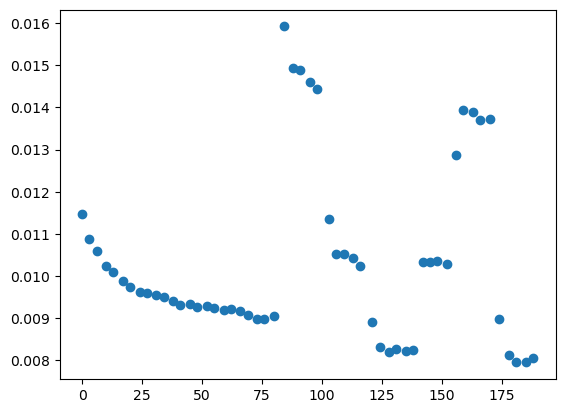

In [18]:
plt.scatter(reactor_1['TOS'].values.astype('float'), reactor_1['Ethanol_FID1A..Amount.']);

In [19]:
xs_vsTOS = pd.read_excel(get_original.content, sheet_name=4)
xs_vsTOS.tail()

,Clock,Experiment,xCO,xH2,Temperature,Vflow,Pressure,TOS,Reactor,X_CO,X_H2,S_Methane,S_Ethane,S_Propane,S_n-Butane,S_nC5,S_nC6,S_Ethylene,S_Propylene,S_n-Butene,S_C5-1,S_C6-1,S_Methanol,S_Ethanol,S_Propanol,S_Butanol,S_Acetaldehyde,S_Propanal,S_Butanal,S_Acetic acid,S_Methyl acetate,S_Ethyl acetate,S_Unknown,S_CO2,S_C2_oxy,S_C2_p_oxy,S_C2_p_HCs,C-balance
263,"09-07-2020 05:40:46,85",7,0.2,0.6,260,41.7,54,182,5,0.09,0.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.27,0.0,0.0,0,79.73,20.27,20.27,0.0,99.677146
264,"09-07-2020 09:09:22,85",7,0.2,0.6,260,41.6,54,185,5,0.07,-3.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,100.00,0.00,0.00,0.0,100.486628
265,"09-07-2020 12:38:24,85",7,0.2,0.6,260,41.7,54,189,5,0.08,-0.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.96,0.0,0.0,0,85.04,14.96,14.96,0.0,100.810152
266,"09-07-2020 16:07:15,85",7,0.2,0.6,260,41.8,54,192,5,0.07,0.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,100.00,0.00,0.00,0.0,100.393517
267,"09-07-2020 19:36:13,85",7,0.2,0.6,260,41.8,54,196,5,0.07,2.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,100.00,0.00,0.00,0.0,98.998821


In [20]:
X = xs_vsTOS.iloc[:,11:-2]
clusters = xs_vsTOS['Reactor']
X.head()

,S_Methane,S_Ethane,S_Propane,S_n-Butane,S_nC5,S_nC6,S_Ethylene,S_Propylene,S_n-Butene,S_C5-1,S_C6-1,S_Methanol,S_Ethanol,S_Propanol,S_Butanol,S_Acetaldehyde,S_Propanal,S_Butanal,S_Acetic acid,S_Methyl acetate,S_Ethyl acetate,S_Unknown,S_CO2,S_C2_oxy,S_C2_p_oxy
0,59.56,4.97,6.46,2.02,0.81,0.37,0.0,0.88,0.15,0,0,0.0,2.88,0.18,0.09,7.54,0.71,0.65,11.63,0.22,0.55,0,0.34,22.05,22.82
1,57.86,4.74,5.92,1.84,0.76,0.34,0.0,1.10,0.15,0,0,0.0,3.32,0.22,0.00,8.11,0.71,0.62,12.90,0.30,0.63,0,0.49,24.33,25.26
2,56.43,4.61,5.60,1.73,0.73,0.34,0.0,0.98,0.14,0,0,0.0,3.64,0.24,0.00,8.52,0.71,0.60,14.08,0.37,0.69,0,0.58,26.24,27.30
3,55.75,4.49,5.36,1.66,0.71,0.26,0.0,1.02,0.15,0,0,0.0,3.86,0.26,0.00,8.78,0.70,0.58,14.61,0.41,0.77,0,0.64,27.25,28.43
4,55.00,4.43,5.23,1.61,0.69,0.29,0.0,1.20,0.15,0,0,0.0,4.08,0.27,0.00,9.06,0.69,0.57,14.81,0.46,0.78,0,0.69,27.95,29.19


In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm

np.random.seed(42)

In [22]:
pca = PCA(n_components=2).fit_transform(X)
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(X)

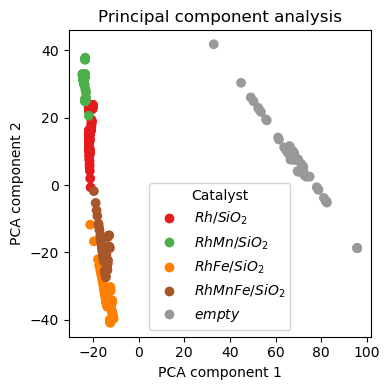

In [23]:
title = 'Catalyst'
labels = [r'$Rh/SiO_2$',r'$RhMn/SiO_2$',r'$RhFe/SiO_2$',r'$RhMnFe/SiO_2$',r'$empty$']

fig, ax = plt.subplots(figsize=(4,4))
plt.title('Principal component analysis')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
scatterplot = ax.scatter(pca[:,0], pca[:,1], c=clusters, cmap=cm.Set1)
ax.legend(handles=scatterplot.legend_elements()[0],labels=labels, title=title)
plt.tight_layout()
plt.savefig('BasCat_PCA.png');

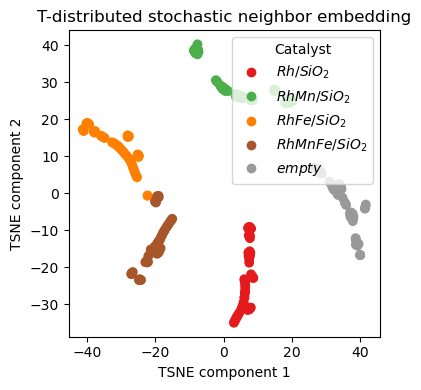

In [24]:
title = 'Catalyst'
labels = [r'$Rh/SiO_2$',r'$RhMn/SiO_2$',r'$RhFe/SiO_2$',r'$RhMnFe/SiO_2$',r'$empty$']

fig, ax = plt.subplots(figsize=(4,4))
plt.title('T-distributed stochastic neighbor embedding')
plt.xlabel('TSNE component 1')
plt.ylabel('TSNE component 2')
scatterplot = ax.scatter(tsne[:,0], tsne[:,1], c=clusters, cmap=cm.Set1)
ax.legend(handles=scatterplot.legend_elements()[0],labels=labels, title=title)
plt.tight_layout()
plt.savefig('BasCat_TSNE.png');

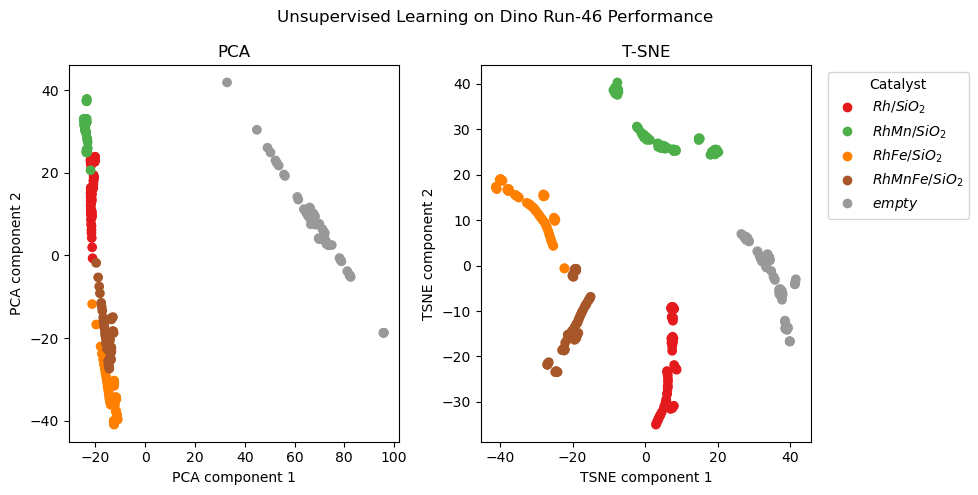

In [25]:
title = 'Catalyst'
labels = [r'$Rh/SiO_2$',r'$RhMn/SiO_2$',r'$RhFe/SiO_2$',r'$RhMnFe/SiO_2$',r'$empty$']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Unsupervised Learning on Dino Run-46 Performance')

ax1.set_title('PCA')
ax1.set_xlabel('PCA component 1')
ax1.set_ylabel('PCA component 2')
scatterplot1 = ax1.scatter(pca[:,0], pca[:,1], c=clusters, cmap=cm.Set1)

ax2.set_title('T-SNE')
ax2.set_xlabel('TSNE component 1')
ax2.set_ylabel('TSNE component 2')
scatterplot2 = ax2.scatter(tsne[:,0], tsne[:,1], c=clusters, cmap=cm.Set1)

ax2.legend(handles=scatterplot2.legend_elements()[0],labels=labels, title=title, bbox_to_anchor=(1.5, 1.0))

plt.tight_layout()
plt.savefig('BasCat_Unsupervised.png');